## Kaggle SF-Salaries Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Salaries.csv')

p:\softwares\anaconda\envs\mytfenv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [4]:
#to convert some of the useful columns into numeric form
cols=df.columns.drop(['EmployeeName','JobTitle'])
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [5]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,NaN,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,NaN,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,NaN,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,NaN,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,NaN,NaN


In [6]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,NaN,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,NaN,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,NaN,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,NaN,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,NaN,NaN


In [7]:
# as these columns are of no good use and filled with null values
df.drop(['Id','Notes','Status','Agency'],inplace=True,axis=1)

In [8]:
df.apply(lambda col:pd.to_numeric(col, errors='coerce'))

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NaN,NaN,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,NaN,NaN,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,NaN,NaN,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,NaN,NaN,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,NaN,NaN,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
148649,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,2014
148650,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,2014
148651,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,2014
148652,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,2014


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
dtypes: float64(6), int64(1), object(2)
memory usage: 10.2+ MB


In [10]:
#for our convenience
df['Year']=df['Year'].astype('str')

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BasePay,148045.0,66325.448840,42764.635495,-166.01,33588.200,65007.45,94691.050,319275.01
OvertimePay,148650.0,5066.059886,11454.380559,-0.01,0.000,0.00,4658.175,245131.88
OtherPay,148650.0,3648.767297,8056.601866,-7058.59,0.000,811.27,4236.065,400184.25
Benefits,112491.0,25007.893151,15402.215858,-33.89,11535.395,28628.62,35566.855,96570.66
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.450,567595.43


#### What is the mean salary of the people?

In [12]:
df['TotalPayBenefits'].mean()

93692.55481056681

In [13]:
#### What is the highest Base Pay and Overtime

In [14]:
df['BasePay'].max()

319275.01

In [15]:
df['OvertimePay'].max()

245131.88

#### What is the highest and lowest salary and who is getting those?

In [16]:
#For max
df.loc[df['TotalPayBenefits']==df['TotalPayBenefits'].max(),:]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011


In [17]:
#For min
df.loc[df['TotalPayBenefits']==df['TotalPayBenefits'].min(),:]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014


#### How the salaries of employees have changed from year 2011-2014

In [18]:
df.groupby('Year').mean()['TotalPayBenefits']

Year
2011     71744.103871
2012    100553.229232
2013    101440.519714
2014    100250.918884
Name: TotalPayBenefits, dtype: float64

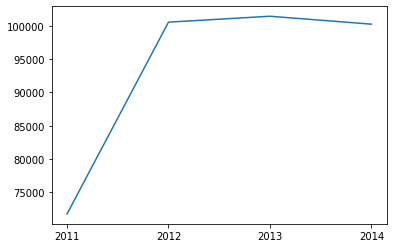

In [19]:
# to represent graphically
yearly_mean=pd.DataFrame(df.groupby('Year').mean()['TotalPayBenefits'])
yearly_mean.reset_index(inplace=True)
fig, ax= plt.subplots()
ax.plot(yearly_mean['Year'],yearly_mean['TotalPayBenefits'])

#### What are some of the most common job titles

In [20]:
df['JobTitle'].value_counts().head(10)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64

#### How Salaries are distributed among 10 most common Job Titles

In [21]:
# to find the most common job titles
df_commonjt=df['JobTitle'].value_counts().head(10)

In [22]:
# to find the mean of titles
df_jtm=df.groupby('JobTitle').mean()['TotalPayBenefits'].reset_index()

In [23]:
#to extract the titles themselves
lst=[]
for index, row in df_commonjt.items():
    lst.append(index)

In [24]:
# to find total pay benefits of the most common titles
df_job=df_jtm[df_jtm['JobTitle'].isin(lst)]

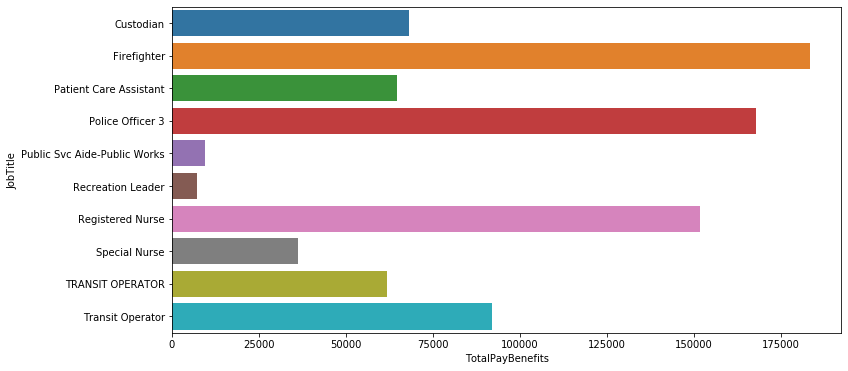

In [25]:
# to represent graphically
fig, ax = plt.subplots(figsize=(12,6))
ax=sns.barplot(x='TotalPayBenefits',y='JobTitle',data=df_job)